## Задание

**Цель:** Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.

**Описание задания:**
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

**Этапы работы:**

1) Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

2) Проведите первичный анализ.  

    а) Проверьте количество записей для каждого класса. Сделайте вывод.  
    
3) Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.  

4) Обучите модель дерева решений RandomForestClassifier на обучающем множестве.  

5) Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).  

6) Обработайте выбросы в данных. 

    а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?  
    b) Исследуйте признаки на выбросы несколькими способами.  
    c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.  

7) Повторите п. 4, п. 5.

8) Сформулируйте выводы по проделанной работе.  

    а) Кратко опишите, какие преобразования были сделаны с данными.  
    b) Сравните точность двух моделей.  
    c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.  
    
Для получения зачета по этому домашнему заданию минимально должны быть реализованы методы по поиску выбросов и построены две модели: «до» и «после» обработки экстремальных значений.


**Результат:** 
- Получены практические знания по работе с выбросами в данных.

**Форма выполнения:**
- ссылка на Jupyter Notebook, загруженный на GitHub;
- ссылка на Google Colab;
- файл с расширением .ipynb.

**Инструменты:**
- Jupyter Notebook/Google Colab;
- GitHub;
- сайт с данными для обучения моделей;
- модель дерева решений RandomForestClassifier.

**Рекомендации к выполнению:**
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

### 1) Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

In [143]:
# подгружаем необходимые библиотеки
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.datasets import load_wine
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np
import matplotlib

data = pd.read_csv('glass.csv')

data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### 2) Проведите первичный анализ.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [3]:
# Видим, что класс 4 полностью отсутствует в датасете
# Классы 3,5 и 6 представленым гораздно меньше чем другие классы

data['Type'].value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

### 3) Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [4]:
X = data.drop(columns=['Type'])
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [5]:
y = data['Type']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


### 4) Обучите модель дерева решений RandomForestClassifier на обучающем множестве.

In [10]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [13]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

### 5) Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [14]:
rfc.score(X_test, y_test)

0.7906976744186046

### 6) Обработайте выбросы в данных.

    а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?  
    b) Исследуйте признаки на выбросы несколькими способами.  
    c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.  


### Атрибут "RI"

/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


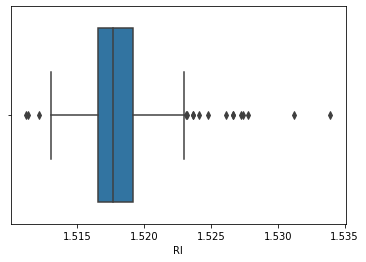

In [144]:
from matplotlib import pyplot as plt
import seaborn as sns


sns.boxplot(data['RI'])

plt.show()

In [145]:
# Воспользуемся методом удаления выбросов через стандартное отклонение

data_mean, data_std = np.mean(data['RI']), np.std(data['RI'])

print(data_mean)
print(data_std)

1.5183654205607469
0.0030297599548275073


In [146]:
cut_off = data_std * 3

lower = data_mean - cut_off
upper = data_mean + cut_off

print(lower)
print(upper)

1.5092761406962643
1.5274547004252295


In [147]:
# Применим фильтр

data = data[(data['RI'] < upper) & (data['RI'] > lower)]

In [148]:
# Изначально было 214 записей, а стало 211

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      211 non-null    float64
 1   Na      211 non-null    float64
 2   Mg      211 non-null    float64
 3   Al      211 non-null    float64
 4   Si      211 non-null    float64
 5   K       211 non-null    float64
 6   Ca      211 non-null    float64
 7   Ba      211 non-null    float64
 8   Fe      211 non-null    float64
 9   Type    211 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.1 KB


### Атрибут "Na"

/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


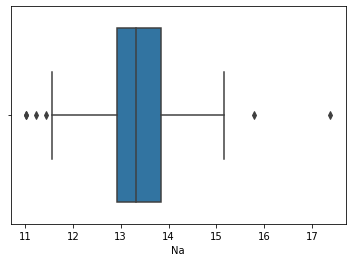

In [149]:
sns.boxplot(data['Na'])

plt.show()

In [150]:
# Попробуем убрать выбросы через Interquartile Range


q25, q75 = np.percentile(data['Na'], 25), np.percentile(data['Na'], 75)

iqr = q75 - q25



In [151]:
cut_off = iqr * 1.5

lower = q25 - cut_off 
upper = q75 + cut_off

print(lower)
print(upper)

11.55
15.23


In [152]:
# Применим фильтр

data = data[(data['Na'] < upper) & (data['Na'] > lower)]

In [153]:
# Было 211 записей, а стало 205

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      205 non-null    float64
 1   Na      205 non-null    float64
 2   Mg      205 non-null    float64
 3   Al      205 non-null    float64
 4   Si      205 non-null    float64
 5   K       205 non-null    float64
 6   Ca      205 non-null    float64
 7   Ba      205 non-null    float64
 8   Fe      205 non-null    float64
 9   Type    205 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 17.6 KB


/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


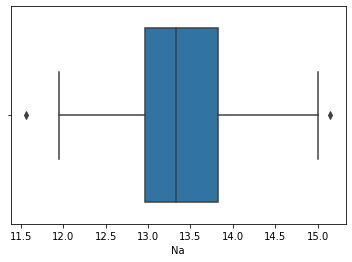

In [154]:
# Посмотрим на визуализацию после уаления выбросов

sns.boxplot(data['Na'])

plt.show()

### Атрибут "Mg" и "Al"

/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


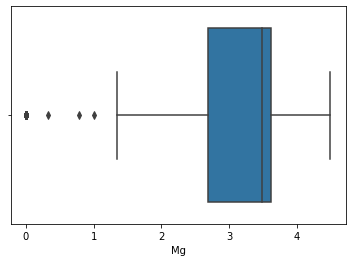

In [155]:
sns.boxplot(data['Mg'])

plt.show()

/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


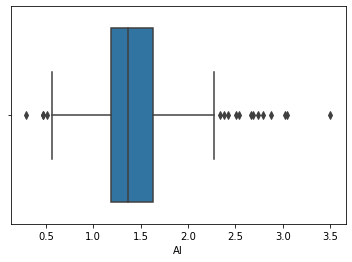

In [156]:
sns.boxplot(data['Al'])

plt.show()

Text(0, 0.5, 'Al')

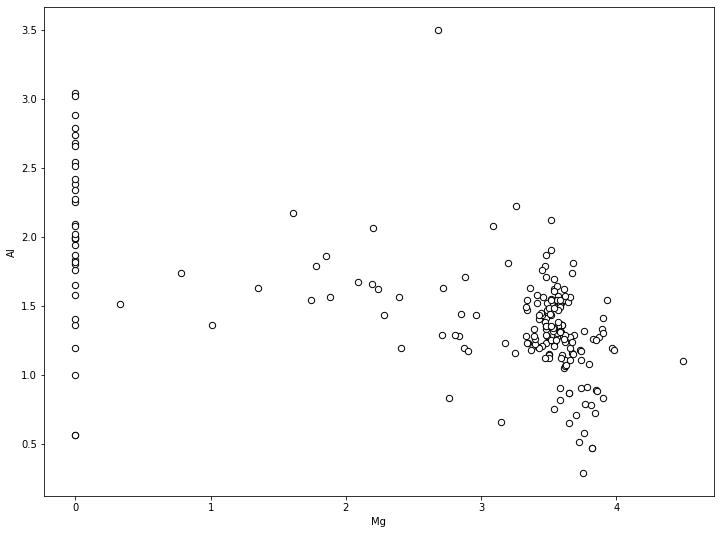

In [157]:
# Визуализируем отношения этих двух атрибутов через код из лекции

plt.figure(figsize=(12,9))

s = 40
b1 = plt.scatter(data['Mg'], data['Al'], c='white', s=s, edgecolors='k')

plt.axis('tight')

plt.xlabel('Mg')
plt.ylabel('Al')


In [158]:
# Применим опорные вектора для поиска выбросов

clf = svm.OneClassSVM(kernel="rbf", nu=0.1)

clf.fit(data[['Mg','Al']])

y_pred = clf.predict(data[['Mg','Al']])

In [159]:
y_pred

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1])

/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  "X does not have valid feature names, but"


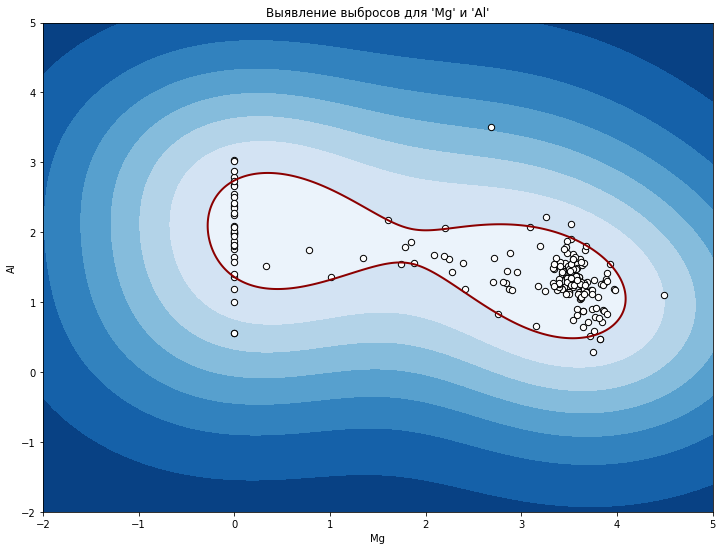

In [160]:
# Построим линию, точки и ближайшие векторы к плоскости
# Разделяющая поверхность
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,9))
plt.title("Выявление выбросов для 'Mg' и 'Al'")

a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

s = 40
b1 = plt.scatter(data['Mg'], data['Al'], c='white', s=s, edgecolors='k')


plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))

plt.xlabel('Mg')
plt.ylabel('Al')

plt.show()

In [161]:
# В идеале надо применить другие методы и посмотреть какие лучше определят выбросы, но сделаем допущение, что SVN правильно их нашел
# И удалим их из датасета


index_list = []

for x in range(len(y_pred)):
    if y_pred[x] == 1:
        index_list.append(x)
        
print(index_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 166, 167, 168, 169, 170, 171, 172, 174, 175, 177, 179, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 201, 202, 203, 204]


In [162]:
# Было 205 и стало 184

data = data.iloc[index_list]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 1 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      184 non-null    float64
 1   Na      184 non-null    float64
 2   Mg      184 non-null    float64
 3   Al      184 non-null    float64
 4   Si      184 non-null    float64
 5   K       184 non-null    float64
 6   Ca      184 non-null    float64
 7   Ba      184 non-null    float64
 8   Fe      184 non-null    float64
 9   Type    184 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.8 KB


/Users/Dmitry/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  "X does not have valid feature names, but"


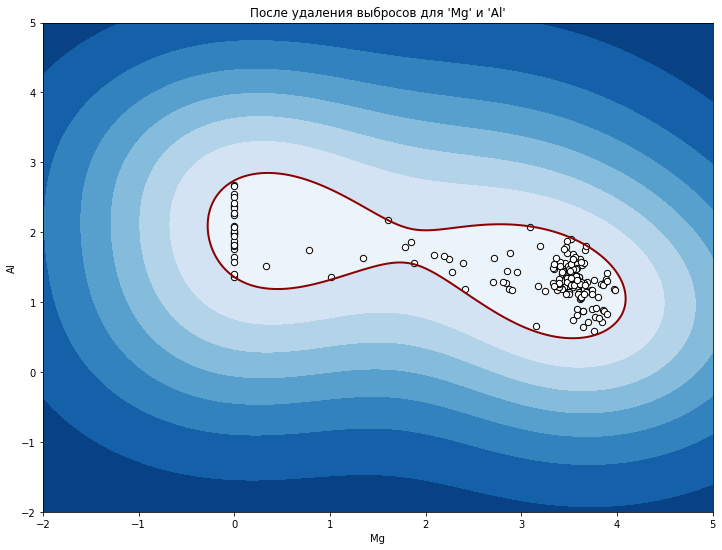

In [163]:
# Визуализация после того как удалили выбросы


xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,9))
plt.title("После удаления выбросов для 'Mg' и 'Al'")

a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

s = 40
b1 = plt.scatter(data['Mg'], data['Al'], c='white', s=s, edgecolors='k')


plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))

plt.xlabel('Mg')
plt.ylabel('Al')

plt.show()

### 7) Повторите п. 4, п. 5.

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.8048780487804879

### 8) Сформулируйте выводы по проделанной работе.


In [165]:
Как можем видеть удаление выбросов может привести улучшению качества модели. 
Для более лучшего результат надо уделить больше времени этому этаму, 
чтобы применить разные методы и посмотреть какие из них лучше отлавливают выбросы и поэксперементировать с разными парами атрибутов

SyntaxError: invalid syntax (<ipython-input-165-33dd8fcc8e5e>, line 1)